## Examine Results Dataframe

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as mp
import matplotlib.pyplot as plt
# force inline plots
%matplotlib inline
plt.style.use('seaborn-deep')
import torch.nn as nn
import copy
import pandas as pd

font = {'family' : 'fantasy',
        'weight' : 'normal',
        'size'   : 18
        }
mp.rc('font', **font)
mp.rc('text', usetex=True)
mp.rc('lines', linewidth=4)

In [3]:
inference_df = pd.read_csv('data/results/inference_df.csv')
inference_df

,Unnamed: 0,theta,calulated_p,phat,Dicrepancy_percnt
0,0,3.000000,0.199148,0.021041,846.487606
1,1,3.001668,0.198899,0.020990,847.609988
2,2,3.003336,0.198651,0.020938,848.734455
3,3,3.005004,0.198402,0.020888,849.859395
4,4,3.006672,0.198154,0.020837,850.985042
...,...,...,...,...,...
1195,1195,4.993328,0.040653,0.001303,3019.592632
1196,1196,4.994996,0.040597,0.001300,3022.267497
1197,1197,4.996664,0.040540,0.001297,3024.938352
1198,1198,4.998332,0.040484,0.001294,3027.611014


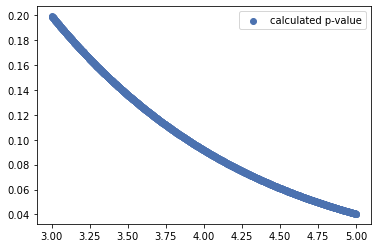

In [7]:
plt.scatter(inference_df.theta, inference_df.calulated_p, label='calculated p-value')
# plt.scatter(inference_df.theta, inference_df.phat, label=r'$\hat{p}$')
plt.legend()

In [26]:
np.sum([st.poisson.pmf(k=N, mu=theta) for N in range(1)])

0.006891715075240962

In [28]:
1-sp.special.gammainc(1+1, theta)

0.04119478098583651

Text(0, 0.5, 'calculated p-value')

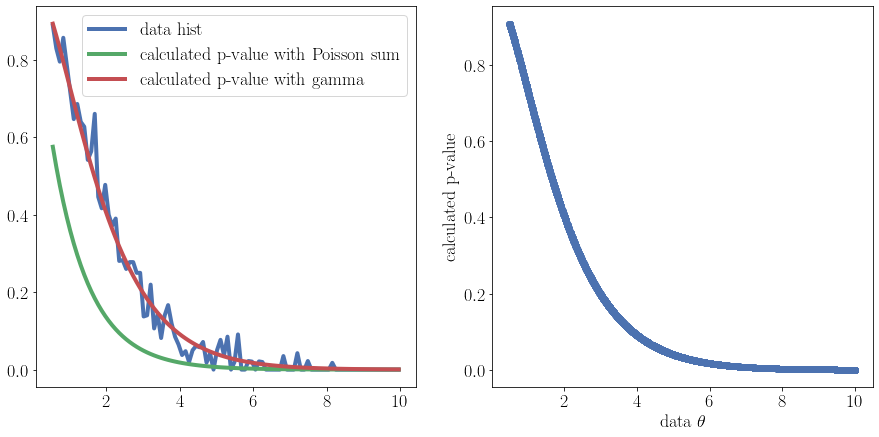

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
data_df = pd.read_csv('data/UNIFORM_5K_CDFD_eq_1.csv')
hist_counts_weighted, b_weighted = np.histogram(data_df.theta, weights=np.array(data_df.Z), bins=100)
hist_counts_unweighted, b_unweighted = np.histogram(data_df.theta, bins=100)

hist_counts= hist_counts_weighted/hist_counts_unweighted
b= b_weighted#/b_unweighted

bin_centers = (b[1:]+b[:-1])/2
# import boost_histogram as bh
# hist = bh.Histogram(bh.axis.Regular(bins=100, start=0, stop=10))
calculated_p_value_poisson_sum, calculated_p_value_gamma =[],[]
D=1
for theta in bin_centers:
    calculated_p_value_gamma.append((1-sp.special.gammainc(D+1, theta)))
    p_cal=np.sum([st.poisson.pmf(k=N, mu=theta) for N in range(D)])
    calculated_p_value_poisson_sum.append(p_cal)
    
ax[0].plot(bin_centers, hist_counts, label='data hist')

ax[0].plot(bin_centers, calculated_p_value_poisson_sum, label='calculated p-value with Poisson sum')
ax[0].plot(bin_centers, calculated_p_value_gamma, label='calculated p-value with gamma')

ax[0].legend()

ax[1].scatter(data_df.theta, (1-sp.special.gammainc(1+1, data_df.theta)))
ax[1].set_xlabel(r'data $\theta$'); ax[1].set_ylabel('calculated p-value')

In [112]:
import boost_histogram as bh
bins, edges = bh.Histogram(bh.axis.Regular(100,0,10))

bins

ValueError: too many values to unpack (expected 2)